#Open Source Lineage

Analysis of the status and progression of funded open source projects.

In [ ]:
import pandas as pd

In [ ]:
# Data set stored in GitHub: Import into a Pandas data frame
csv_file = "https://github.com/jmstanto/oslineage/raw/main/NSFopenSourceAwards.csv"

award_data = pd.read_csv(csv_file, encoding = "ISO-8859-1")

In [ ]:
award_data.columns # Show the list of variables in the file

Index(['AwardNumber', 'Title', 'NSFOrganization', 'Program(s)', 'StartDate',
       'LastAmendmentDate', 'PrincipalInvestigator', 'State', 'Organization',
       'AwardInstrument', 'ProgramManager', 'EndDate', 'AwardedAmountToDate',
       'Co-PIName(s)', 'PIEmailAddress', 'OrganizationStreet',
       'OrganizationCity', 'OrganizationState', 'OrganizationZip',
       'OrganizationPhone', 'NSFDirectorate', 'ProgramElementCode(s)',
       'ProgramReferenceCode(s)', 'ARRAAmount', 'Abstract'],
      dtype='object')

In [ ]:
# For descriptive purposes, examine a distribution of awards across states
state_groups = award_data.groupby('OrganizationState').agg('count')

state_groups

,AwardNumber,Title,NSFOrganization,Program(s),StartDate,LastAmendmentDate,PrincipalInvestigator,State,Organization,AwardInstrument,...,PIEmailAddress,OrganizationStreet,OrganizationCity,OrganizationZip,OrganizationPhone,NSFDirectorate,ProgramElementCode(s),ProgramReferenceCode(s),ARRAAmount,Abstract
OrganizationState,,,,,,,,,,,,,,,,,,,,,
AK,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
AL,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,31,32,32
AR,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
AZ,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,44,52,52
CA,290,290,290,290,290,290,290,290,290,290,...,289,289,290,290,289,290,290,246,290,290
CO,71,71,71,71,71,71,71,71,71,71,...,69,69,71,71,69,71,71,57,71,71
CT,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,24,29,29
DC,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,18,23,23
DE,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,6,7,7


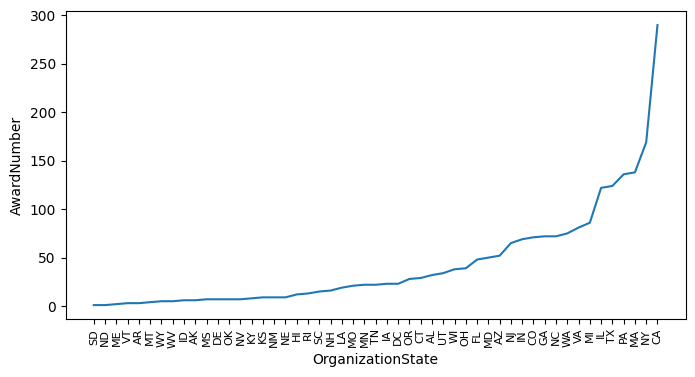

In [ ]:
# Now display as a graph
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))

sorted_df = state_groups.sort_values('AwardNumber')

#display that sorted df as a line plot
sns.lineplot(x="OrganizationState", y="AwardNumber", sort=False, data=sorted_df)

plt.xticks(rotation=90, fontsize=8)

plt.show()

In [ ]:
# Task 1: Convert 'AwardedAmountToDate' to integer and store in a new variable
amounts = []
awarded_amount = award_data['AwardedAmountToDate']

for index, amount in awarded_amount.items():
    amounts.append(int(amount[1:-3].replace(',','')))

award_data['AwardedAmount'] = amounts

array([[<Axes: title={'center': 'AwardedAmount'}>]], dtype=object)

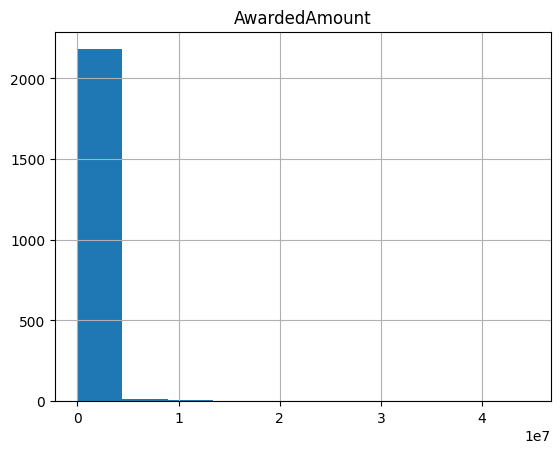

In [ ]:
# Task 2: Create a histogram of the integer variable of award amount
award_data.hist(column='AwardedAmount')

In [ ]:
# Task 3: Convert 'StartDate', 'LastAmendmentDate', and 'EndDate' to
# proper time-date variables
award_data['StartDate'] = pd.to_datetime(award_data['StartDate'])
award_data['LastAmendmentDate'] = pd.to_datetime(award_data['LastAmendmentDate'])
award_data['EndDate'] = pd.to_datetime(award_data['EndDate'])

array([[<Axes: title={'center': 'StartDate'}>]], dtype=object)

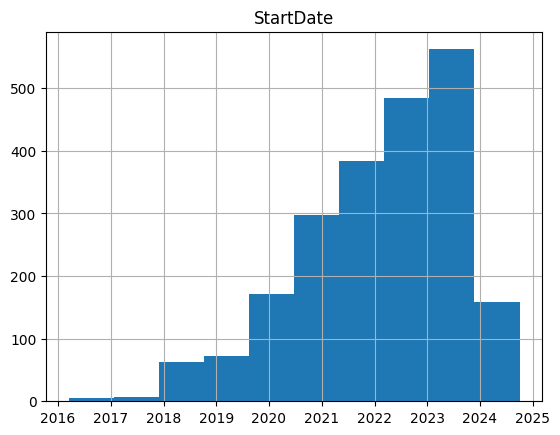

In [ ]:
# Task 4: Create a histogram of start dates
award_data.hist(column='StartDate')

In [ ]:
# Task 5: Extract a new data frame with just PrincipalInvestigator
# and Co-PIName(s); keep AwardNumber as a unique index
pis_df = award_data[['PrincipalInvestigator', 'Co-PIName(s)']].copy()

In [ ]:
# Task 6: Parse Co-PIName(s) into individual lists of strings
# by splitting on the comma; trim leading and trailing spaces
copis = award_data['Co-PIName(s)'].str.split(pat=", ")

In [ ]:
# Task 7: Use nested loop to create pairs of PI-coPI names.
# Store in a new data frame
pairs = []

for index, pi in award_data['PrincipalInvestigator'].items():
    if isinstance(copis[index], list):
        for copi in copis[index]:
            pairs.append((pi, copi))

pairs_df = pd.DataFrame(pairs)

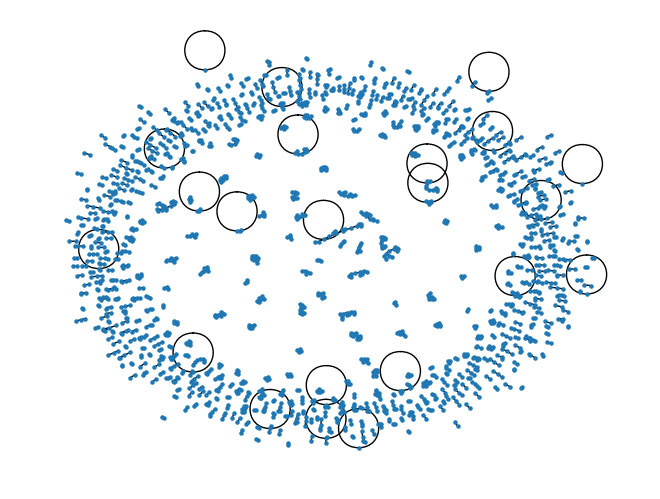

In [ ]:
# Task 8: Use the name pairs to create and display a network diagram
import networkx as nx

G = nx.Graph()

for pair in pairs:
    G.add_edge(pair[0], pair[1])

nx.draw(G, node_size=5, font_size=5)
plt.show()

In [ ]:
# Task 9: Copy the award data into a new DF, keeping only the
# AwardNumber, Title, and Abstract. Use spaCy to create doc
# objects from each title. Store the doc objects on the DF
import spacy

nlp = spacy.load("en_core_web_sm")
ov_df = award_data[['AwardNumber', 'Title', 'Abstract']].copy()

titles = []

for index, title in award_data['Title'].items():
    doc = nlp(title)
    titles.append(doc)

ov_df['TitleDoc'] = titles

In [ ]:
# Task 10: Review examples of the tokens generated
# by spaCy for a few of the titles
#print(ov_df['TitleDoc'])

In [ ]:
# Task 11: Use nested loops to find and display tokens
# from the Title that are designated as entities
# Store the token text for the first entity detected (if any)
first_entities = []

for index, title in ov_df['TitleDoc'].items():
    doc = title
    for ent in doc.ents:
        if ent.label_ == "ORG" or ent.label_ == "PERSON" or ent.label_ == "WORK_OF_ART" or ent.label_ == "PRODUCT":
            first_entities.append(ent.text)
        break

first_entities = [f for f in first_entities if first_entities.count(f) <=8]

In [ ]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

all_stopwords = list(text.ENGLISH_STOP_WORDS)

vectorizer = CountVectorizer(lowercase=True, stop_words=all_stopwords)

dtm = vectorizer.fit_transform(ov_df['Abstract'])

dtm = pd.DataFrame(dtm.toarray())

dtm.columns = vectorizer.get_feature_names_out()

tfidf_vect = TfidfVectorizer(lowercase=True, stop_words=all_stopwords)

tfidf = tfidf_vect.fit_transform(ov_df['Abstract'])

tfidf = pd.DataFrame(tfidf.toarray())

tfidf.columns = tfidf_vect.get_feature_names_out()

freq_list = dtm.sum(axis=0)

tfidf_list = tfidf.sum(axis=0)

compare_df = pd.concat([freq_list, tfidf_list], axis=1)

compare_df.columns = ['Frequency', 'TF-IDF']

#tfidf

#count = 0

#for entity, row in tfidf.iterrows():
 # count += 1
#  if count >= 3:
 #   break
  #print("row: ", row)

compare_df

#compare_df['TF-IDF'].sort_values(ascending=True)


,Frequency,TF-IDF
000,100,3.757891
0001,1,0.085303
00131600,1,0.101245
060,3,0.277064
097,4,0.276557
...,...,...
zstandard,1,0.070850
ztc,5,0.277772
ztf,4,0.321813
ztx,3,0.166663


In [ ]:
#first_5 = tfidf.head(5)

#for index, row in first_5.iterrows():
#  sorted_row = row.sort_values(ascending=True)
#  count = 0
#  for word, score in sorted_row.items():
#    if score > 0:
#      count += 1
#      print(word, score)
#    if count >= 5:
#      break
#    print()

#print(tfidf)

print(tfidf_list.sort_values(ascending=True))

#potential method 2 - store abstracts in doc, then for each entity in doc see if mentioned in tfidf
#abstracts = []

#for index, abstract in award_data['Abstract'].items():
 # doc = nlp(abstract)
#  abstracts.append(doc)

#ov_df['AbstractDoc'] = abstracts

#for index, abstract in ov_df['AbstractDoc'].items():
 # for ent in abstract.ents:
  #  if ent in

#tfidf_list gives list of tfidf according to the whole document
#high tfidf means word appears more often = less rare
#low tfidf probably means that it is a good entity name
#we sort the list
#we loop





gallons        0.032975
snowmelts      0.032975
850            0.032975
rainwater      0.032975
rainfalls      0.032975
                ...    
learning      57.358037
research      70.498384
project       94.103006
data          95.761179
br           109.350205
Length: 18753, dtype: float64


In [ ]:
# Task 13: Repeat the entity analysis for Abstract, but store the results
# on each row of the DF as a complete list of entities detected
abstracts = []

for index, abstract in award_data['Abstract'].items():
    doc = nlp(abstract)
    abstracts.append(doc)

ov_df['AbstractDoc'] = abstracts

all_entities = []

for index, abstract in ov_df['AbstractDoc'].items():
    doc = abstract
    row_entities = []
    for ent in doc.ents:
        if ent.label_ == "ORG" or ent.label_ == "PERSON" or ent.label_ == "WORK_OF_ART" or ent.label_ == "PRODUCT":
            row_entities.append(ent.text)

    row_entities = set(row_entities)

    strings_to_remove = ["AI", "Best Practices", "Behavioral Data", "Broader Impacts", "the Directorate for Technology, Innovation and Partnerships", "Foundation", "ML", "NSF", "OSE", "Open Source Ecosystem", "OSS", "Pathways to Enable Open-Source Ecosystems", "the Pathways to Enable Open-Source Ecosystems", "POSE", "project", "projects", "project?s", "STEM"]
    row_entities = [r for r in row_entities if r not in strings_to_remove]
    all_entities.append(row_entities)

ov_df['AllEntities'] = all_entities

In [ ]:
# Task 14: Use nested loops to expand the list of entities
# in a new DF with one entity per row. Include the award
# number for future reference.
separate_entities = []

for index, entity in ov_df['AllEntities'].items():
    number = ov_df['AwardNumber'].loc[ov_df.index[index]]
    for e in entity:
        separate_entities.append(e)

entities_df = pd.DataFrame(separate_entities)

In [ ]:
# Task 15: Create a word cloud of entity texts and use
# group_by to see if there are any entities mentioned
# more than once

In [ ]:
# Task 16: Create an experimental loop that runs just a few examples of the following:
# a - grab the text of an entity name and enclose it in quotes
# b - run a google search of the quoted text
# c - count the number of promising URLs returned
# d - note whether GitHub is among the domain names mentioned
# e - save the GitHub URL if it is in the list

In [ ]:
# Task 17: Using results of the experiment, create a streamlined loop
# that finds and stores GitHub links for as many entities as possible
from googlesearch import search

count = 0

queries = []
urls = []

for index, entity in ov_df['AllEntities'].items():
    #number = ov_df['AwardNumber'].loc[ov_df.index[index]]

    query = ""
    for e in entity:
        query += e + " "
    if len(query) > 0:
        query += "site:github.com"
    queries.append(query)

    #url_list = [str(number) + " "]
    url_list = []

    for j in search(query, tld="com", num=5, stop=10, pause=2):
        url_list.append(j)

    urls.append(url_list)

    count += 1

    if count >= 100:
        break

test_df = pd.DataFrame()
test_df['Query'] = queries
test_df['URL'] = urls
#print(test_df)

test_df.to_csv('test.csv')

In [ ]:
# Task 18: Use GitHub API to discover the date of the last update
# of the repository in question, for each project that appears
# to have a repository


In [ ]:
# Task 19: Visualize active versus "expired" and "not found" projects by
# using the last update date


In [ ]:
# Task 20: Use award numbers to link back to the original data
# and create a map of all of the active projects
